# Imports

In [41]:
from IPython.display import display, HTML

def displayHorizontalDataframes(dfs, titles):
    """
    Display a list of pandas dataframes horizontally with titles on top.
    
    Parameters:
    dfs (list): List of pandas DataFrames.
    titles (list): List of titles (strings) corresponding to each DataFrame.
    """
    if len(dfs) != len(titles):
        raise ValueError("The number of dataframes and titles must be the same.")

    # Start a flex container to align content horizontally and center them.
    html = (
        "<div style='display: flex; justify-content: center; "
        "align-items: flex-start;'>"
    )
    
    # Iterate over the dataframes and their corresponding titles.
    for df, title in zip(dfs, titles):
        title = " " if not title else title
        html += (
            "<div style='margin-left: 20px; margin-right: 20px; text-align: center;'>"
            f"<h3>{title}</h3>"
            f"{df.to_html(classes='dataframe', border=1)}"
            "</div>"
        )
    
    html += "</div>"
    display(HTML(html))

In [42]:
import pandas as pd
# import plotly.express as px
# import plotly.graph_objects as go
from ydata_profiling import ProfileReport
import numpy as np

dtype_mapping = {
    'propertyId': pd.StringDtype(),
    'localityName': 'category',
    'landMarks': pd.StringDtype(),
    'locality': pd.StringDtype(),
    'price': pd.Int64Dtype(),
    'nameOfSociety': pd.StringDtype(),
    'projectName': pd.StringDtype(),
    'carpetArea': pd.Int64Dtype(),
    'coveredArea': pd.Int64Dtype(),
    'carpetAreaSqft': pd.Int64Dtype(),
    'possessionStatus': pd.StringDtype(),
    'developerName': pd.StringDtype(),
    'flooringType': pd.StringDtype(),
    'floorNumber': pd.Int64Dtype(),
    'unitCountonFloor': pd.Int64Dtype(),
    'totalFloorNumber': pd.Int64Dtype(),
    'electricityStatus': pd.StringDtype(),
    'waterStatus': pd.StringDtype(),
    'longitude': pd.Float64Dtype(),
    'latitude': pd.Float64Dtype(),
    'transactionType': 'category',
    'facing': pd.StringDtype(),
    'ownershipType': pd.StringDtype(),
    'carParking': pd.StringDtype(),
    'furnished': 'category',
    'bedrooms': pd.Int64Dtype(),
    'bathrooms': pd.Int64Dtype(),
    'numberOfBalconied': pd.Int64Dtype(),
    'propertyType': 'category',
    'additionalRooms': pd.StringDtype(),
    'bookingAmountExact': pd.Int64Dtype(),
    'maintenanceChargesFrequency': 'category',
    'maintenanceCharges': pd.Int64Dtype(),
    'ageofcons': 'category',
    'isVerified': 'category',
    'listingTypeDesc': 'category',
    'premiumProperty': pd.BooleanDtype(),
    'noOfLifts': pd.Int64Dtype(),
    'propertyAmenities': pd.StringDtype(),
    'facilitiesDesc': pd.StringDtype(),
    'uuid': pd.StringDtype(),
    'flooringType_Vitrified': pd.BooleanDtype(),
    'flooringType_CeramicTiles': pd.BooleanDtype(),
    'flooringType_Marble': pd.BooleanDtype(),
    'flooringType_NormalTilesKotahStone': pd.BooleanDtype(),
    'flooringType_Granite': pd.BooleanDtype(),
    'flooringType_Wooden': pd.BooleanDtype(),
    'flooringType_Mosaic': pd.BooleanDtype(),
    'flooringType_Marbonite': pd.BooleanDtype(),
    'additionalRoom_PujaRoom': pd.BooleanDtype(),
    'additionalRoom_Study': pd.BooleanDtype(),
    'additionalRoom_Store': pd.BooleanDtype(),
    'additionalRoom_ServantRoom': pd.BooleanDtype(),
    'carParking_Open': pd.Int64Dtype(),
    'carParking_Covered': pd.Int64Dtype(),
    'ReservedParking': pd.BooleanDtype(),
}

COLUMNS_TO_DROP = [
    'coveredArea'
]

df = pd.read_csv(
    '../Data/train_imputed.csv',
    dtype = dtype_mapping,
    index_col=0
)

df.fillna(pd.NA, inplace=True)

df.drop(COLUMNS_TO_DROP, axis=1, inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19252 entries, 61872777 to 75703109
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             19252 non-null  Int64   
 1   localityName      19252 non-null  category
 2   carpetArea        19252 non-null  Int64   
 3   floorNumber       19252 non-null  Int64   
 4   totalFloorNumber  19252 non-null  Int64   
 5   bedrooms          19252 non-null  Int64   
 6   bathrooms         19252 non-null  Int64   
 7   ReservedParking   19252 non-null  boolean 
 8   transactionType   19252 non-null  category
 9   furnished         19252 non-null  category
 10  ageofcons         19252 non-null  category
dtypes: Int64(6), boolean(1), category(4)
memory usage: 1.8 MB


# Univariate and Bivariate analysis using YData Profiling

In [4]:
report = ProfileReport(
    df=df,
    title='Feature Selection Data',
)
report.to_file('Reports/FeatureSelectionOnTrainingDataV1.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 76.69it/s]


## Observations V1
1. Posession status is exteremely imbalanced. Less than 0.07 % of the non null values are 'Under Construction'. Rest are 'Ready To Move'. Can be dropped.
2. carpetAreaSqft is not a useful feature because it leaks data on the target variable. Can be dropped.
3. 

In [5]:
df['furnished'].unique()

['Unfurnished', 'Semi-Furnished', 'Furnished']
Categories (3, object): ['Furnished', 'Semi-Furnished', 'Unfurnished']

# Feature Encoding

Dropping columns prematurely because of following reasons:
1. Unavailablility of these columns during prediction (Since prediction will be done by asking for input from user)
2. Very high number of missing values (cannot impute the values confidently)

In [44]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Suppose your fully imputed training data is in a DataFrame called `df`
# and you have already separated out the target column "price".
X_train = df.drop("price", axis=1)
y_train = df["price"]

# List of numeric features
numeric_cols = [
    "carpetArea",
    "floorNumber",
    "totalFloorNumber",
    "bedrooms",
    "bathrooms",
]

# For the three features that will be encoded differently:
cat_diff_cols = ["localityName", "transactionType"]

# The remaining categorical columns that are on an inherently ordinal scale.
# We also include "localityName" here since it is not being handled by the
# special one-hot vs. ordinal difference (it has many unique levels so ordinal
# encoding may be preferred).
ordinal_cols = ["furnished", "ReservedParking", "ageofcons"]

# =============================================================================
# Pipeline for linear models
#   - Numerical features: standard scaled.
#   - For transactionType, furnished, ReservedParking: one-hot encoded.
#   - For ordinal_cols (localityName, ageofcons): ordinal-encoded
#     and then scaled (so that all features are on a similar scale).
# =============================================================================

# Define transformers
numeric_transformer = StandardScaler()

onehot_transformer = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# Here we create a pipeline that first ordinal-encodes then scales the result.
furnished_order = ['Unfurnished', 'Semi-Furnished', 'Furnished']
ordinal_transformer_furnished = Pipeline(
    steps=[
        ("ordinal", OrdinalEncoder(categories=[furnished_order])),
        ("scaler", StandardScaler()),
    ]
)

# Here we create a pipeline that first ordinal-encodes then scales the result.
ordinal_transformer_rs = Pipeline(
    steps=[
        ("ordinal", OrdinalEncoder()),
        ("scaler", StandardScaler()),
    ]
)

# Here we create a pipeline that first ordinal-encodes then scales the result.
age_order = [
    'Under Construction',  # first: youngest / newest state
    'New Construction',
    'Less than 5 years',
    '5 to 10 years',
    '10 to 15 years',
    '15 to 20 years',
    'Above 20 years'       # last: oldest
]
ordinal_transformer_ageofcons = Pipeline(
    steps=[
        ("ordinal", OrdinalEncoder(categories=[age_order])),
        ("scaler", StandardScaler()),
    ]
)

# Create the ColumnTransformer for the linear pipeline.
lin_preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("onehot", onehot_transformer, cat_diff_cols),
        ("ord-furnished", ordinal_transformer_furnished, ["furnished"]),
        ("ord-reservedparking", ordinal_transformer_rs, ["ReservedParking"]),
        ("ord-ageofcons", ordinal_transformer_ageofcons, ["ageofcons"]),
    ]
)

# The overall pipeline (here you could add a linear model as the final estimator)
lin_pipeline = Pipeline(steps=[("preprocessor", lin_preprocessor)])
# Now transform the training features for the linear model:
X_linear = lin_pipeline.fit_transform(X_train)

# =============================================================================
# Pipeline for tree-based models
#   - Numerical features: standard scaled.
#   - For all categorical features (transactionType, furnished, ReservedParking,
#     localityName, ageofcons): ordinal-encoded and then scaled.
# =============================================================================

# Create a pipeline for encoding the categorical features as ordinal then scaling.
tree_cat_transformer = Pipeline(
    steps=[
        ("ordinal", OrdinalEncoder()),
        ("scaler", StandardScaler()),
    ]
)

tree_preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("ord", tree_cat_transformer, cat_diff_cols),
        ("ord-furnished", ordinal_transformer_furnished, ["furnished"]),
        ("ord-reservedparking", ordinal_transformer_rs, ["ReservedParking"]),
        ("ord-ageofcons", ordinal_transformer_ageofcons, ["ageofcons"]),
    ]
)

tree_pipeline = Pipeline(steps=[("preprocessor", tree_preprocessor)])
# Now transform the training features for the tree models:
X_tree = tree_pipeline.fit_transform(X_train)

# =============================================================================
# After these steps:
#   - X_linear is your preprocessed feature array for linear models.
#   - X_tree is your preprocessed feature array for tree-based models.
#
# You can now proceed to train your respective models with X_linear or X_tree.
# =============================================================================


print("Linear model feature shape:", X_linear.shape)
print("Tree model feature shape:", X_tree.shape)


Linear model feature shape: (19252, 164)
Tree model feature shape: (19252, 10)


# Feature Importance

## Defining Results

In [45]:
# =============================================================================
# GLOBAL VARIABLE: a dictionary to store all feature importance results
# =============================================================================
feature_importance_results = {}

# =============================================================================
# ASSUMPTIONS:
#   - X_linear is a NumPy array with shape (19252, 167), preprocessed for linear models.
#   - X_tree is a NumPy array with shape (19252, 10), preprocessed for tree-based models.
#   - y_train is a pandas Series containing the target (price).
#
# The assumed feature order is:
#   For X_linear:
#     0:  carpetArea
#     1:  floorNumber
#     2:  totalFloorNumber
#     3:  bedrooms
#     4:  bathrooms
#     5-158: localityName (154 columns)
#     159-160: transactionType (2 columns)
#     161: furnished
#     162: ReservedParking
#     163: ageofcons
#
#   For X_tree (preprocessed with ordinal encoding):
#     0:  carpetArea
#     1:  floorNumber
#     2:  totalFloorNumber
#     3:  bedrooms
#     4:  bathrooms
#     5:  localityName (1 column)
#     6:  transactionType (1 column)
#     7:  furnished (1 column)
#     8:  ReservedParking (1 column)
#     9:  ageofcons 
# =============================================================================

# Define groups for X_linear for aggregating the one-hot encoded columns:
linear_feature_groups = {
    "carpetArea": [0],
    "floorNumber": [1],
    "totalFloorNumber": [2],
    "bedrooms": [3],
    "bathrooms": [4],
    "localityName": list(range(5, 5 + 154)),         # 154 columns: indices 5 to 158
    "transactionType": list(range(5 + 154, 5 + 154 + 2)),    # 2 columns: indices 159 to 160
    "furnished": [161],    # 1 columns: indices 161
    "ReservedParking": [162],  # 1 columns: indices 162
    "ageofcons": [163]
}

# For X_tree, manually define feature names (because it is a NumPy array)
tree_feature_names = [
    "carpetArea",
    "floorNumber",
    "totalFloorNumber",
    "bedrooms",
    "bathrooms",
    "localityName",
    "transactionType",
    "furnished",
    "ReservedParking",
    "ageofcons",
]

## Univariate and Statistical Test Methods

### F Regression

In [8]:
# =============================================================================
# STEP 2: UNIVARIATE AND STATISTICAL TEST METHODS
# =============================================================================
from sklearn.feature_selection import f_regression, r_regression
from sklearn.feature_selection import mutual_info_regression
# --------------------------
# (A) f_regression for X_linear
# --------------------------
f_scores_linear, p_values_linear = f_regression(X_linear, y_train)

# Aggregate scores for each original feature group from X_linear
group_f_scores_linear = {}
group_p_values_linear = {}
for feature, indices in linear_feature_groups.items():
    # Aggregate the f_regression scores (using mean)
    group_f_scores_linear[feature] = np.mean(f_scores_linear[indices])
    group_p_values_linear[feature] = np.mean(p_values_linear[indices])

# Store the aggregated f_regression results for the linear features
feature_importance_results["f_regression"] = {
    "linear": {
        "scores": group_f_scores_linear,
        "p_values": group_p_values_linear
    }
}

# --------------------------
# (C) f_regression for X_tree
# --------------------------
f_scores_tree, p_values_tree = f_regression(X_tree, y_train)
# Create a dictionary mapping each tree feature (manually defined) to its score
f_regression_tree_results = dict(zip(tree_feature_names, f_scores_tree))
p_values_tree_dict = dict(zip(tree_feature_names, p_values_tree))

# Store f_regression results for the tree features
feature_importance_results["f_regression"] = {
    "tree": {
        "scores": f_regression_tree_results,
        "p_values": p_values_tree_dict
    }
}

In [9]:
displayHorizontalDataframes(
    [pd.Series(group_f_scores_linear).sort_values(ascending=False).reset_index(),
    pd.Series(f_regression_tree_results).sort_values(ascending=False).reset_index()],
    ["F stats for Linear Encoded", "F stats for Tree Encoded"],
)

,index,0
0,carpetArea,89728.211096
1,bathrooms,20797.214453
2,bedrooms,15587.720847
3,totalFloorNumber,1408.407318
4,floorNumber,912.269721
5,transactionType,231.905466
6,ReservedParking,223.844492
7,furnished,132.885738
8,localityName,51.975482
9,ageofcons,38.549258


### R Regression

In [10]:
# --------------------------
# (B) r_regression for X_linear
# --------------------------
r_scores_linear = r_regression(X_linear, y_train)
group_r_scores_linear = {}
for feature, indices in linear_feature_groups.items():
    group_r_scores_linear[feature] = np.mean(r_scores_linear[indices])

# Store the aggregated r_regression results for the linear features
feature_importance_results["r_regression"] = {
    "linear": {
        "scores": group_r_scores_linear,
    }
}

# --------------------------
# (D) r_regression for X_tree
# --------------------------
r_scores_tree = r_regression(X_tree, y_train)
r_regression_tree_results = dict(zip(tree_feature_names, r_scores_tree))

# Store r_regression results for the tree features
feature_importance_results["r_regression"] = {
    "tree": {
        "scores": r_regression_tree_results,
    }
}

In [11]:
displayHorizontalDataframes(
    [pd.Series(group_r_scores_linear).sort_values(ascending=False).reset_index(),
    pd.Series(r_regression_tree_results).sort_values(ascending=False).reset_index()],
    ["R scores for Linear Encoding", "R scores for Tree Encoding"],
)

,index,0
0,carpetArea,9.073914e-01
1,bathrooms,7.206368e-01
2,bedrooms,6.689081e-01
3,totalFloorNumber,2.611053e-01
4,floorNumber,2.127120e-01
5,ReservedParking,1.072130e-01
6,furnished,8.279993e-02
7,localityName,9.289694e-04
8,transactionType,1.353084e-15
9,ageofcons,-4.470522e-02


### Mutual Information

In [12]:
# --------------------------
# (E) Mutual Information for X_linear
# --------------------------
# mi_scores_linear = mutual_info_regression(X_linear, y_train, n_neighbors=10)
# group_mi_scores_linear = {}
# for feature, indices in linear_feature_groups.items():
#     group_mi_scores_linear[feature] = np.mean(mi_scores_linear[indices])

# # Store mutual information results for X_linear
# feature_importance_results["mutual_info_linear_10"] = group_mi_scores_linear

mi_scores_linear = mutual_info_regression(X_linear, y_train, n_neighbors=25)
group_mi_scores_linear = {}
for feature, indices in linear_feature_groups.items():
    group_mi_scores_linear[feature] = np.mean(mi_scores_linear[indices])

# Store mutual information results for X_linear
feature_importance_results["mutual_info"] = {
    "linear": {"scores": group_mi_scores_linear}
}

# mi_scores_linear = mutual_info_regression(X_linear, y_train, n_neighbors=50)
# group_mi_scores_linear = {}
# for feature, indices in linear_feature_groups.items():
#     group_mi_scores_linear[feature] = np.mean(mi_scores_linear[indices])

# # Store mutual information results for X_linear
# feature_importance_results["mutual_info_linear_50"] = group_mi_scores_linear

# --------------------------
# (F) Mutual Information for X_tree
# --------------------------
# mi_scores_tree = mutual_info_regression(X_tree, y_train, n_neighbors=10)
# mutual_info_tree_results = dict(zip(tree_feature_names, mi_scores_tree))

# # Store mutual information results for X_tree
# feature_importance_results["mutual_info_tree_10"] = mutual_info_tree_results

mi_scores_tree = mutual_info_regression(X_tree, y_train, n_neighbors=25)
mutual_info_tree_results = dict(zip(tree_feature_names, mi_scores_tree))

# Store mutual information results for X_tree
feature_importance_results["mutual_info"] = {
    "tree": {"scores": mutual_info_tree_results}
}

# mi_scores_tree = mutual_info_regression(X_tree, y_train, n_neighbors=50)
# mutual_info_tree_results = dict(zip(tree_feature_names, mi_scores_tree))

# # Store mutual information results for X_tree
# feature_importance_results["mutual_info_tree_50"] = mutual_info_tree_results

In [13]:
# displayHorizontalDataframes(
#     [pd.Series(feature_importance_results["mutual_info_linear_10"]).sort_values(ascending=False).reset_index(),
#     pd.Series(feature_importance_results["mutual_info_tree_10"]).sort_values(ascending=False).reset_index()],
#     ["Mutual Info for Linear Encoding for 10 neighbors", "Mutual Info for Tree Encoding for 10 neighbors"],
# )

In [14]:
displayHorizontalDataframes(
    [pd.Series(group_mi_scores_linear).sort_values(ascending=False).reset_index(),
    pd.Series(mutual_info_tree_results).sort_values(ascending=False).reset_index()],
    ["Mutual Info for Linear Encoding for 25 neighbors", "Mutual Info for Tree Encoding for 25 neighbors"],
)

,index,0
0,carpetArea,0.990144
1,bedrooms,0.631792
2,bathrooms,0.616692
3,totalFloorNumber,0.206502
4,ageofcons,0.103114
5,transactionType,0.099967
6,floorNumber,0.093355
7,ReservedParking,0.023949
8,furnished,0.011104
9,localityName,0.003377


In [15]:
# displayHorizontalDataframes(
#     [pd.Series(feature_importance_results["mutual_info_linear_50"]).sort_values(ascending=False).reset_index(),
#     pd.Series(feature_importance_results["mutual_info_tree_50"]).sort_values(ascending=False).reset_index()],
#     ["Mutual Info for Linear Encoding for 50 neighbors", "Mutual Info for Tree Encoding for 50 neighbors"],
# )

## Model Based Feature Selection

### Defining Metrics

In [47]:
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

def compute_cv_metrics(model, X, y, is_linear=False, group_mapping=None, feature_names=None, epsilon=1e-10):
    """
    Run 5-fold CV on the given model.
    
    For each fold:
      - Fit the model.
      - Get test predictions.
      - Compute the absolute error distribution from test predictions, and then
        calculate summary statistics: mean, std, median, min, max, 5th, 25th, 75th,
        and 95th percentiles.
      - Compute the absolute percentage error (APE) for each test point, avoiding
        divide-by-zero errors by adding a small constant (epsilon) to the denominator.
      - Extract feature importance:
          * For linear models (is_linear==True), use model.coef_ and aggregate using
            the provided group_mapping.
          * For tree-based models, use model.feature_importances_ along with
            feature_names.
    
    Returns:
      - mae_df: a dataframe (index: fold1 to fold5; columns: the summary stats)
      - mape_df: a dataframe (index: fold1 to fold5; columns: the summary stats for MAPE)
      - ape_df: a dataframe containing APE for all points across folds
      - avg_importance: a dictionary with aggregated feature importance values (mean over folds)
    """
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_mae_stats = []
    fold_mape_stats = []
    fold_importances = []
    
    fold_no = 1
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train_cv)
        y_pred = model.predict(X_test)
        
        # Compute absolute error for each test point.
        abs_errors = np.abs(y_test_cv - y_pred)
        
        # Compute absolute percentage error for each test point, avoiding divide-by-zero errors.
        ape = (abs_errors / (np.abs(y_test_cv) + epsilon)) * 100
        
        # Compute summary statistics from the distribution of absolute errors.
        mae_stats = {
            "mean": np.mean(abs_errors),
            "std": np.std(abs_errors),
            "median": np.median(abs_errors),
            "min": np.min(abs_errors),
            "max": np.max(abs_errors),
            "5th percentile": np.percentile(abs_errors, 5),
            "25th percentile": np.percentile(abs_errors, 25),
            "75th percentile": np.percentile(abs_errors, 75),
            "95th percentile": np.percentile(abs_errors, 95)
        }
        fold_mae_stats.append(mae_stats)
        
        # Compute summary statistics from the distribution of absolute percentage errors.
        mape_stats = {
            "mean": np.mean(ape),
            "std": np.std(ape),
            "median": np.median(ape),
            "min": np.min(ape),
            "max": np.max(ape),
            "5th percentile": np.percentile(ape, 5),
            "25th percentile": np.percentile(ape, 25),
            "75th percentile": np.percentile(ape, 75),
            "95th percentile": np.percentile(ape, 95)
        }
        fold_mape_stats.append(mape_stats)
        
        # Extract feature importance from the current fold.
        if is_linear:
            coefs = model.coef_
            agg_importance = {}
            for feat, indices in group_mapping.items():
                agg_importance[feat] = np.mean(np.abs(coefs[indices]))
            fold_importances.append(agg_importance)
        else:
            importances = model.feature_importances_
            feat_imp = dict(zip(feature_names, importances))
            fold_importances.append(feat_imp)
        
        fold_no += 1

    # Create DataFrames with one row per fold
    mae_df = pd.DataFrame(fold_mae_stats, index=[f'fold{i}' for i in range(1, 6)])
    mape_df = pd.DataFrame(fold_mape_stats, index=[f'fold{i}' for i in range(1, 6)])
    
    # Aggregate feature importances by computing the mean for each feature over folds.
    avg_importance = {}
    if is_linear:
        for feat in group_mapping.keys():
            avg_importance[feat] = np.mean([fi[feat] for fi in fold_importances])
    else:
        for feat in feature_names:
            avg_importance[feat] = np.mean([fi[feat] for fi in fold_importances])
    
    return mae_df, mape_df, avg_importance


### Linear Regression

In [48]:
# ================================
# MODEL: Regular Linear Regression
# ================================
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()
mae_df_lr, mape_df_lr, avg_imp_lr = compute_cv_metrics(
    lin_reg_model, X_linear, y_train, is_linear=True, group_mapping=linear_feature_groups
)
# Store results in our global dictionary
feature_importance_results["LinearRegression"] = {
    "linear": {
        "cv_mae": mae_df_lr,
        "cv_mape": mape_df_lr,
        "scores": avg_imp_lr
    }
}

mae_df_lr

,mean,std,median,min,max,5th percentile,25th percentile,75th percentile,95th percentile
fold1,2.497867e+06,4.263218e+06,1.430071e+06,91.273942,7.026589e+07,116953.191910,646108.269245,2.847388e+06,7.541261e+06
fold2,2.499700e+06,3.979896e+06,1.499131e+06,20.220851,6.136399e+07,115016.529772,669043.693577,2.796942e+06,7.665094e+06
fold3,2.543565e+06,4.748794e+06,1.488111e+06,1754.687173,9.667496e+07,132420.976029,678520.569739,2.783063e+06,7.600974e+06
fold4,2.525029e+06,4.487873e+06,1.487536e+06,920.317946,7.869673e+07,125361.025126,674028.600970,2.795965e+06,7.464686e+06
fold5,2.606056e+06,5.015196e+06,1.472459e+06,461.719555,1.513066e+08,131679.985173,679745.083052,2.786616e+06,7.971989e+06


In [49]:
mape_df_lr

,mean,std,median,min,max,5th percentile,25th percentile,75th percentile,95th percentile
fold1,27.583496,38.495968,18.291200,0.001404,1284.072045,1.673581,8.441634,34.599096,80.641000
fold2,28.801541,34.166250,19.056457,0.000409,520.655910,1.449411,8.614977,37.171711,88.184995
fold3,28.004495,31.707979,18.250776,0.008161,346.863572,1.924480,8.624435,35.241476,87.269563
fold4,28.625132,32.914724,19.426252,0.013736,400.543534,1.664953,8.684797,36.940659,86.048587
fold5,28.479876,34.584736,18.730319,0.014975,864.741906,1.704724,8.673026,36.560305,85.531916


In [50]:
pd.Series(avg_imp_lr).sort_values(ascending=False)/10000

carpetArea          1342.705674
localityName         298.107090
bedrooms             225.911870
transactionType       79.517007
totalFloorNumber      78.834618
ageofcons             54.644413
bathrooms             41.537945
furnished             11.850134
floorNumber            2.393702
ReservedParking        2.151237
dtype: float64

### ElasticNet Regression

In [51]:
# ================================
# MODEL: ElasticNet Regression
# ================================
from sklearn.linear_model import ElasticNet

en_model_cv = ElasticNet(random_state=42, alpha=0.01, l1_ratio=0.5)
mae_df_en, mape_df_en, avg_imp_en = compute_cv_metrics(
    en_model_cv, X_linear, y_train, is_linear=True, group_mapping=linear_feature_groups
)
feature_importance_results["ElasticNet"] = {
    "linear": {
        "cv_mae": mae_df_en,
        "cv_mape": mape_df_en,
        "scores": avg_imp_en
    }
}

mae_df_en

,mean,std,median,min,max,5th percentile,25th percentile,75th percentile,95th percentile
fold1,2.576467e+06,4.368681e+06,1.506069e+06,562.627063,7.509221e+07,123228.997873,664753.033244,2.897938e+06,7.895525e+06
fold2,2.591813e+06,4.387710e+06,1.526585e+06,98.733064,7.526204e+07,139188.033889,690338.891790,2.903467e+06,7.819995e+06
fold3,2.628913e+06,4.968771e+06,1.513435e+06,499.673948,1.187708e+08,134270.548587,696940.988241,2.868266e+06,7.785975e+06
fold4,2.583644e+06,4.749507e+06,1.539297e+06,1171.721968,8.959150e+07,159013.956815,710379.932369,2.828817e+06,7.179486e+06
fold5,2.721772e+06,5.547086e+06,1.524310e+06,1449.998162,1.719161e+08,142657.442577,713914.421696,2.866038e+06,7.961756e+06


In [52]:
mape_df_en

,mean,std,median,min,max,5th percentile,25th percentile,75th percentile,95th percentile
fold1,28.422466,33.753230,19.516235,0.003410,628.504849,1.602799,8.646134,36.512017,82.711682
fold2,29.141762,33.205723,19.678744,0.003949,427.245216,1.712825,8.786773,37.766133,86.449234
fold3,28.415126,31.092100,19.362479,0.004345,398.713609,1.827253,9.275924,36.763890,85.006033
fold4,28.848617,31.558606,19.672171,0.013019,374.199613,1.971376,9.288111,37.504932,83.892668
fold5,28.824922,31.388359,19.933212,0.024167,397.650794,1.930022,8.983392,37.597410,83.965810


In [53]:
pd.Series(avg_imp_en).sort_values(ascending=False)/1000

carpetArea          14049.501523
bedrooms             2434.442764
localityName          807.462533
bathrooms             710.879518
transactionType       651.274929
totalFloorNumber      649.432902
ageofcons             323.648595
furnished             164.512944
floorNumber            68.962298
ReservedParking        10.378841
dtype: float64

### Random Forest Regressor

In [54]:
# ================================
# MODEL: Random Forest Regressor
# ================================
from sklearn.ensemble import RandomForestRegressor

rf_cv_model = RandomForestRegressor(n_estimators=150, random_state=42)
mae_df_rf, mape_df_rf, avg_imp_rf = compute_cv_metrics(
    rf_cv_model, X_tree, y_train, is_linear=False, feature_names=tree_feature_names
)
feature_importance_results["RandomForest"] = {
    "tree": {
        "cv_mae": mae_df_rf,
        "cv_mape": mape_df_rf,
        "scores": avg_imp_rf
    }
}

mae_df_rf

,mean,std,median,min,max,5th percentile,25th percentile,75th percentile,95th percentile
fold1,1.925788e+06,4.045584e+06,922942.613333,636.666667,7.836317e+07,76666.666667,390263.806667,1.914872e+06,6.586252e+06
fold2,1.886130e+06,3.822332e+06,915477.793333,0.000000,8.070733e+07,66456.650000,372606.720000,1.931758e+06,6.263854e+06
fold3,1.824317e+06,3.762166e+06,882333.143333,333.333333,9.713913e+07,71673.002619,391819.927778,1.879167e+06,6.382062e+06
fold4,1.797188e+06,3.802100e+06,862123.526667,666.666667,1.063720e+08,67528.541667,381204.180000,1.853239e+06,6.049960e+06
fold5,2.002789e+06,5.046544e+06,927877.210000,306.666667,1.663929e+08,72669.333333,391525.771667,1.915255e+06,6.745680e+06


In [55]:
mape_df_rf

,mean,std,median,min,max,5th percentile,25th percentile,75th percentile,95th percentile
fold1,18.509533,21.038349,12.599036,0.003167,358.594963,0.930007,5.198305,24.190444,55.380693
fold2,18.306414,20.663835,12.305556,0.000000,249.022222,0.944180,5.277721,24.173914,53.334083
fold3,17.434963,18.381166,12.366942,0.004831,223.333332,1.050156,5.464877,23.411983,49.925782
fold4,17.605871,18.368881,12.309671,0.007667,213.203922,0.903191,5.440236,23.639514,51.893762
fold5,18.077218,19.178380,12.587829,0.002899,260.606974,1.082893,5.492672,24.554238,52.148276


In [56]:
pd.Series(avg_imp_rf).sort_values(ascending=False)*1000

carpetArea          874.812740
localityName         43.464510
totalFloorNumber     27.879728
floorNumber          20.737438
ageofcons            11.716094
bathrooms             8.733228
furnished             5.453966
bedrooms              4.413348
transactionType       2.424028
ReservedParking       0.364919
dtype: float64

### XGBoost

In [57]:
# ================================
# MODEL: XGBoost Regressor
# ================================
import xgboost as xgb

xgb_cv_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=500)
mae_df_xgb, mape_df_xgb, avg_imp_xgb = compute_cv_metrics(
    xgb_cv_model, X_tree, y_train, is_linear=False, feature_names=tree_feature_names
)
feature_importance_results["XGBoost"] = {
    "tree": {
        "cv_mae": mae_df_xgb,
        "cv_mape": mape_df_xgb,
        "scores": avg_imp_xgb
    }
}

mae_df_xgb

,mean,std,median,min,max,5th percentile,25th percentile,75th percentile,95th percentile
fold1,1.725574e+06,3.377805e+06,815828.500,57.5,60554064.0,65402.3750,353082.0000,1719681.625,6073456.0
fold2,1.774902e+06,3.815683e+06,814539.000,120.0,78676552.0,65715.0000,345691.5000,1705065.500,6156630.5
fold3,1.695726e+06,3.520353e+06,829844.125,177.5,85343408.0,65831.2500,345196.7500,1685972.375,5572884.1
fold4,1.620103e+06,3.373456e+06,794858.000,817.0,92259024.0,63094.4625,340969.5625,1699741.250,5346217.0
fold5,1.758928e+06,4.115093e+06,773385.000,6.0,111942847.0,71458.1500,350629.6250,1729196.000,5719594.7


In [58]:
mape_df_xgb

,mean,std,median,min,max,5th percentile,25th percentile,75th percentile,95th percentile
fold1,16.005157,17.717695,11.711850,0.001369,373.114000,0.840433,5.052301,20.857784,45.330650
fold2,15.839584,16.918288,11.227659,0.001739,250.374100,0.894030,4.989708,21.491648,43.443164
fold3,15.420644,17.031121,11.089538,0.003367,485.146490,0.944972,5.069766,20.879603,41.279905
fold4,15.327258,15.131621,11.182174,0.011347,168.989528,0.970472,4.879466,21.066793,43.765524
fold5,15.418104,15.981992,11.253673,0.000059,294.144769,1.035491,4.973198,20.699186,42.555666


In [59]:
pd.Series(avg_imp_xgb).sort_values(ascending=False)*1000

carpetArea          698.647339
localityName         69.265602
bathrooms            51.246113
bedrooms             39.623142
totalFloorNumber     38.292507
transactionType      29.050331
ageofcons            27.078617
floorNumber          24.227726
furnished            18.192623
ReservedParking       4.375976
dtype: float32

### Decision Tree

In [60]:
# ================================
# MODEL: Decision Tree Regressor
# ================================
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

tree_cv_model = DecisionTreeRegressor(random_state=42)
mae_df_tree, mape_df_tree, avg_imp_tree = compute_cv_metrics(
    tree_cv_model, X_tree, y_train, is_linear=False, feature_names=tree_feature_names
)
feature_importance_results["DecisionTree"] = {
    "tree": {
        "cv_mae": mae_df_tree,
        "cv_mape": mape_df_tree,
        "scores": avg_imp_tree
    }
}

mae_df_tree

,mean,std,median,min,max,5th percentile,25th percentile,75th percentile,95th percentile
fold1,2.557901e+06,5.739065e+06,1200000.0,0.0,175000000.0,1000.000,499499.0,2500000.0,8899600.0
fold2,2.540177e+06,5.568921e+06,1200000.0,0.0,105000000.0,28904.000,500000.0,2516596.5,8500000.0
fold3,2.422857e+06,5.143593e+06,1100000.0,0.0,113000000.0,200.350,500000.0,2500000.0,8000000.0
fold4,2.458849e+06,5.225909e+06,1100000.0,0.0,87500000.0,3993.400,450000.0,2500000.0,8433000.0
fold5,2.595117e+06,6.073459e+06,1100000.0,0.0,178382015.0,287.625,500000.0,2500000.0,8919000.0


In [61]:
mape_df_tree

,mean,std,median,min,max,5th percentile,25th percentile,75th percentile,95th percentile
fold1,23.836361,28.975872,16.328372,0.0,483.333333,0.013563,6.163343,31.793758,70.942982
fold2,24.122695,29.800228,15.921926,0.0,483.333333,0.305361,6.250000,31.578947,72.783389
fold3,23.431261,26.473575,15.921578,0.0,306.250000,0.002774,6.075110,31.818182,70.239523
fold4,24.051338,27.236465,15.954545,0.0,285.714286,0.034272,6.060606,32.626941,74.262097
fold5,23.951067,28.390803,15.789474,0.0,382.142857,0.006680,6.303357,31.804663,71.559524


In [62]:
pd.Series(avg_imp_tree).sort_values(ascending=False)*10000

carpetArea          8727.229211
localityName         447.755467
totalFloorNumber     288.546037
floorNumber          211.763536
ageofcons            123.395049
bathrooms             83.172257
furnished             52.484466
bedrooms              43.348401
transactionType       18.786378
ReservedParking        3.519200
dtype: float64

## Permutation Importance

### Defining Metrics

In [38]:
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
# from sklearn.svm import SVR
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

### Random Forests

In [30]:
# ------------------------------------------------------------------------------------------------
# (A) Permutation Importance for Random Forest (using X_tree)
# ------------------------------------------------------------------------------------------------
rf_perm_model = RandomForestRegressor(n_estimators=150, random_state=42)
rf_perm_model.fit(X_tree, y_train)

# Compute baseline MAE on X_tree with the fitted Random Forest model.
y_pred_rf = rf_perm_model.predict(X_tree)
baseline_mae_rf = mean_absolute_error(y_train, y_pred_rf)

rf_perm_result = permutation_importance(
    rf_perm_model,
    X_tree,
    y_train,
    scoring="neg_mean_absolute_error",
    n_repeats=10,
    random_state=42,
)
# Map permutation importance to feature names.
rf_perm_importances = dict(zip(tree_feature_names, rf_perm_result.importances_mean))
feature_importance_results["Permutation_RandomForest"] = {
    "tree":{
        "baseline_mae": baseline_mae_rf,
        "scores": rf_perm_importances,
    }
}

pd.Series(np.abs(y_train - y_pred_rf)).describe()

count            19252.0
mean       685216.530009
std       1516956.770171
min                  0.0
25%        139634.926667
50%             327000.0
75%        684816.493333
max      63942939.597778
Name: price, dtype: Float64

In [31]:
pd.Series(np.abs(y_train - y_pred_rf)/ (np.abs(y_train) + 1e-10) * 100).describe()

count     19252.0
mean     6.533811
std      7.222083
min           0.0
25%      1.938708
50%      4.476445
75%      8.670791
max      151.8978
Name: price, dtype: Float64

In [32]:
pd.Series(rf_perm_importances).sort_values(ascending=False)/1000

carpetArea          8485.056481
localityName        1584.384040
totalFloorNumber    1106.993713
floorNumber          511.468982
ageofcons            381.141288
bedrooms             329.112221
bathrooms            315.006583
furnished            260.479803
transactionType      149.698285
ReservedParking       27.087448
dtype: float64

### Linear Regression

In [33]:
# ------------------------------------------------------------------------------------------------
# (B) Permutation Importance for Regular Linear Regression (using X_linear)
# ------------------------------------------------------------------------------------------------
lin_perm_model = LinearRegression()
lin_perm_model.fit(X_linear, y_train)

# Compute baseline MAE on X_linear using regular Linear Regression.
y_pred_lin = lin_perm_model.predict(X_linear)
baseline_mae_lin = mean_absolute_error(y_train, y_pred_lin)

lin_perm_result = permutation_importance(
    lin_perm_model,
    X_linear,
    y_train,
    scoring="neg_mean_absolute_error",
    n_repeats=10,
    random_state=42,
)
lin_perm_scores = lin_perm_result.importances_mean
group_lin_perm_importances = {}
for feat, indices in linear_feature_groups.items():
    group_lin_perm_importances[feat] = np.mean(lin_perm_scores[indices])
feature_importance_results["Permutation_LinearRegression"] = {
    "linear":{
        "baseline_mae": baseline_mae_lin,
        "scores": group_lin_perm_importances,
    }
}

pd.Series(np.abs(y_train - y_pred_lin)).describe()

count             19252.0
mean       2506209.059422
std        4458696.955061
min             11.298849
25%         662709.664199
50%        1467088.644356
75%        2764570.054779
max      147363046.665414
Name: price, dtype: Float64

In [34]:
pd.Series(np.abs(y_train - y_pred_lin)/ (np.abs(y_train) + 1e-10) * 100).describe()

count        19252.0
mean       27.882572
std        33.627918
min         0.000226
25%         8.566909
50%        18.611929
75%        35.647136
max      1236.302912
Name: price, dtype: Float64

In [35]:
pd.Series(group_lin_perm_importances).sort_values(ascending=False)/1000

carpetArea          9011.842229
bedrooms            1312.877690
totalFloorNumber     124.092897
ageofcons             76.365198
transactionType       61.673505
localityName          12.876313
ReservedParking        5.602599
furnished              5.526991
floorNumber            1.259844
bathrooms             -1.295076
dtype: float64

### SVM RBF kernel

In [36]:
# # ------------------------------------------------------------------------------------------------
# # (C) Permutation Importance for SVR with RBF Kernel on X_linear (one-hot encoding)
# # ------------------------------------------------------------------------------------------------
# svr_rbf_linear = SVR(kernel="rbf")
# svr_rbf_linear.fit(X_linear, y_train)

# # Compute baseline MAE for SVR (RBF) on X_linear.
# y_pred_svr_rbf_linear = svr_rbf_linear.predict(X_linear)
# baseline_mae_svr_rbf_linear = mean_absolute_error(y_train, y_pred_svr_rbf_linear)

# pd.Series(np.abs(y_train - y_pred_svr_rbf_linear)).describe()

count             19252.0
mean       6683294.137221
std       13621374.502576
min              0.851693
25%        1499617.584976
50%        3299871.242141
75%        5399223.150647
max      270880886.387316
Name: price, dtype: Float64

In [37]:
# pd.Series(np.abs(y_train - y_pred_svr_rbf_linear)/ (np.abs(y_train) + 1e-10) * 100).describe()

count       19252.0
mean      63.102583
std       69.137487
min        0.000011
25%       19.619728
50%       44.431852
75%       78.561398
max      1149.98215
Name: price, dtype: Float64

In [ ]:
# svr_rbf_linear_result = permutation_importance(
#     svr_rbf_linear,
#     X_linear,
#     y_train,
#     scoring="neg_mean_absolute_error",
#     n_repeats=10,
#     random_state=42,
# )
# svr_rbf_linear_scores = svr_rbf_linear_result.importances_mean
# group_svr_rbf_linear_importances = {}
# for feat, indices in linear_feature_groups.items():
#     group_svr_rbf_linear_importances[feat] = np.mean(svr_rbf_linear_scores[indices])
# feature_importance_results["Permutation_SVR_RBF_linear"] = {
#     "baseline_mae": baseline_mae_svr_rbf_linear,
#     "perm_importances": group_svr_rbf_linear_importances,
# }

# print("\nPermutation Importance (SVR RBF on Linear Encoding):")
# print("Baseline MAE:", baseline_mae_svr_rbf_linear)
# print(group_svr_rbf_linear_importances)

In [8]:
# # ------------------------------------------------------------------------------------------------
# # (D) Permutation Importance for SVR with RBF Kernel on X_tree (ordinal encoding)
# # ------------------------------------------------------------------------------------------------
# svr_rbf_tree = SVR(kernel="rbf")
# svr_rbf_tree.fit(X_tree, y_train)

# # Compute baseline MAE for SVR (RBF) on X_tree.
# y_pred_svr_rbf_tree = svr_rbf_tree.predict(X_tree)
# baseline_mae_svr_rbf_tree = mean_absolute_error(y_train, y_pred_svr_rbf_tree)

# pd.Series(np.abs(y_train - y_pred_svr_rbf_tree)).describe()

count             19252.0
mean        6683310.67684
std       13621354.030016
min              0.106972
25%        1499614.190652
50%        3299949.095296
75%        5399287.815574
max      270880794.600432
Name: price, dtype: Float64

In [9]:
# pd.Series(np.abs(y_train - y_pred_svr_rbf_tree)/ (np.abs(y_train) + 1e-10) * 100).describe()

count        19252.0
mean       63.103344
std        69.138594
min         0.000001
25%        19.623718
50%        44.431997
75%        78.563557
max      1150.008844
Name: price, dtype: Float64

In [ ]:
# svr_rbf_tree_result = permutation_importance(
#     svr_rbf_tree,
#     X_tree,
#     y_train,
#     scoring="neg_mean_absolute_error",
#     n_repeats=10,
#     random_state=42,
# )
# svr_rbf_tree_importances = dict(zip(tree_feature_names, svr_rbf_tree_result.importances_mean))
# feature_importance_results["Permutation_SVR_RBF_tree"] = {
#     "baseline_mae": baseline_mae_svr_rbf_tree,
#     "perm_importances": svr_rbf_tree_importances,
# }

# print("\nPermutation Importance (SVR RBF on Tree Encoding):")
# print("Baseline MAE:", baseline_mae_svr_rbf_tree)
# print(svr_rbf_tree_importances)

### SVM Ploynomial Kernel

In [10]:
# # ------------------------------------------------------------------------------------------------
# # (E) Permutation Importance for SVR with Polynomial Kernel on X_linear (one-hot encoding)
# # ------------------------------------------------------------------------------------------------
# svr_poly_linear = SVR(kernel="poly", degree=2)
# svr_poly_linear.fit(X_linear, y_train)

# # Compute baseline MAE for SVR (Poly) on X_linear.
# y_pred_svr_poly_linear = svr_poly_linear.predict(X_linear)
# baseline_mae_svr_poly_linear = mean_absolute_error(y_train, y_pred_svr_poly_linear)

# pd.Series(np.abs(y_train - y_pred_svr_poly_linear)).describe()

count             19252.0
mean       6683331.060127
std       13619991.696468
min              0.325752
25%        1499919.687774
50%        3300149.155254
75%        5400183.817031
max      270871098.289348
Name: price, dtype: Float64

In [11]:
# pd.Series(np.abs(y_train - y_pred_svr_poly_linear)/ (np.abs(y_train) + 1e-10) * 100).describe()

count        19252.0
mean       63.109016
std         69.14669
min         0.000004
25%        19.614098
50%         44.43732
75%        78.570088
max      1149.813439
Name: price, dtype: Float64

In [ ]:
# svr_poly_linear_result = permutation_importance(
#     svr_poly_linear,
#     X_linear,
#     y_train,
#     scoring="neg_mean_absolute_error",
#     n_repeats=10,
#     random_state=42,
# )
# svr_poly_linear_scores = svr_poly_linear_result.importances_mean
# group_svr_poly_linear_importances = {}
# for feat, indices in linear_feature_groups.items():
#     group_svr_poly_linear_importances[feat] = np.mean(svr_poly_linear_scores[indices])
# feature_importance_results["Permutation_SVR_Poly_linear"] = {
#     "baseline_mae": baseline_mae_svr_poly_linear,
#     "perm_importances": group_svr_poly_linear_importances,
# }

# print("\nPermutation Importance (SVR Poly on Linear Encoding):")
# print("Baseline MAE:", baseline_mae_svr_poly_linear)
# print(group_svr_poly_linear_importances)

In [ ]:
# # ------------------------------------------------------------------------------------------------
# # (F) Permutation Importance for SVR with Polynomial Kernel on X_tree (ordinal encoding)
# # ------------------------------------------------------------------------------------------------
# svr_poly_tree = SVR(kernel="poly", degree=2)
# svr_poly_tree.fit(X_tree, y_train)

# # Compute baseline MAE for SVR (Poly) on X_tree.
# y_pred_svr_poly_tree = svr_poly_tree.predict(X_tree)
# baseline_mae_svr_poly_tree = mean_absolute_error(y_train, y_pred_svr_poly_tree)

# pd.Series(np.abs(y_train - y_pred_svr_poly_tree)).describe()

In [ ]:
# pd.Series(np.abs(y_train - y_pred_svr_poly_tree)/ (np.abs(y_train) + 1e-10) * 100).describe()

In [ ]:
# svr_poly_tree_result = permutation_importance(
#     svr_poly_tree,
#     X_tree,
#     y_train,
#     scoring="neg_mean_absolute_error",
#     n_repeats=10,
#     random_state=42,
# )
# svr_poly_tree_importances = dict(zip(tree_feature_names, svr_poly_tree_result.importances_mean))
# feature_importance_results["Permutation_SVR_Poly_tree"] = {
#     "baseline_mae": baseline_mae_svr_poly_tree,
#     "perm_importances": svr_poly_tree_importances,
# }

# print("\nPermutation Importance (SVR Poly on Tree Encoding):")
# print("Baseline MAE:", baseline_mae_svr_poly_tree)
# print(svr_poly_tree_importances)

### XGBoost

In [39]:
# ------------------------------------------------------------------------------------------------
# (G) Permutation Importance for XGBoost (using X_tree)
# ------------------------------------------------------------------------------------------------
xgb_perm_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, n_estimators=500)
xgb_perm_model.fit(X_tree, y_train)

# Compute baseline MAE for XGBoost on X_tree.
y_pred_xgb = xgb_perm_model.predict(X_tree)
baseline_mae_xgb = mean_absolute_error(y_train, y_pred_xgb)

pd.Series(np.abs(y_train - y_pred_xgb)).describe()

count          19252.0
mean     596873.825664
std      623418.132451
min               14.0
25%           181962.0
50%         408891.375
75%         805922.625
max          9989488.0
Name: price, dtype: Float64

In [40]:
pd.Series((np.abs(y_train - y_pred_xgb)/ (np.abs(y_train) + 1e-10)) * 100).describe()

count       19252.0
mean       8.184065
std        8.982448
min        0.000045
25%        2.179812
50%        5.443474
75%       11.190972
max      132.376514
Name: price, dtype: Float64

In [ ]:
xgb_perm_result = permutation_importance(
    xgb_perm_model,
    X_tree,
    y_train,
    scoring="neg_mean_absolute_error",
    n_repeats=10,
    random_state=42,
)
xgb_perm_importances = dict(zip(tree_feature_names, xgb_perm_result.importances_mean))
feature_importance_results["Permutation_XGBoost"] = {
    "baseline_mae": baseline_mae_xgb,
    "scores": xgb_perm_importances,
}

pd.Series(xgb_perm_importances).sort_values(ascending=False)/10000

carpetArea          711.127049
localityName        229.015221
totalFloorNumber    131.902752
bedrooms             78.085027
floorNumber          67.210795
bathrooms            60.539532
ageofcons            50.500718
furnished            23.445045
transactionType      16.837171
ReservedParking       4.755343
dtype: float64

### Decision Tree

In [ ]:
# ------------------------------------------------------------------------------------------------
# (H) Permutation Importance for Decision Trees
# ------------------------------------------------------------------------------------------------
dt_perm_model = DecisionTreeRegressor(random_state=0)
dt_perm_model.fit(X_train, y_train)

# Compute baseline MAE for Decision Tree on X_train.
y_pred_dt = dt_perm_model.predict(X_train)
baseline_mae_dt = mean_absolute_error(y_train, y_pred_dt)

pd.Series(np.abs(y_train - y_pred_dt)).describe()


## SHAP feature importance

In [6]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

# Set random seed for reproducibility
np.random.seed(42)

# Select a sample of 100 observations for SHAP (for speed)
sample_idx_linear = np.random.choice(X_linear.shape[0], size=500, replace=False)
sample_idx_tree   = np.random.choice(X_tree.shape[0], size=500, replace=False)


### Linear Regression

In [7]:
# ===========================================================
# 1. SHAP for Regular Linear Regression (using X_linear)
# ===========================================================
lin_model_shap = LinearRegression()
lin_model_shap.fit(X_linear, y_train)

# Use the LinearExplainer for linear models.
lin_explainer = shap.LinearExplainer(lin_model_shap, X_linear)
# Compute SHAP values on the sample.
shap_values_lin = lin_explainer.shap_values(X_linear[sample_idx_linear])

# Aggregate SHAP values for the one-hot encoded data.
# Compute mean absolute SHAP value per column.
mean_shap_values_lin = np.mean(np.abs(shap_values_lin), axis=0)

# Aggregate per feature group (for example, localityName is spread over multiple columns).
group_shap_importance_lin = {}
for feat, indices in linear_feature_groups.items():
    group_shap_importance_lin[feat] = np.mean(mean_shap_values_lin[indices])

# Store results in the global dictionary.
feature_importance_results["SHAP_LinearRegression"] = {
    "model": lin_model_shap,
    "shap_values": shap_values_lin,
    "data": X_linear[sample_idx_linear],
    "scores": group_shap_importance_lin
}

pd.Series(group_shap_importance_lin).sort_values(ascending=False)/1000

carpetArea          8879.060465
bedrooms            1833.941779
totalFloorNumber     576.642299
ageofcons            469.927333
bathrooms            311.804043
transactionType      293.823189
furnished            107.717870
ReservedParking       57.513180
localityName          31.946705
floorNumber           11.229566
dtype: float64

C:\Users\bhagy\AppData\Local\Temp\ipykernel_36252\567745476.py:24: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_lin, X_linear[sample_idx_linear],


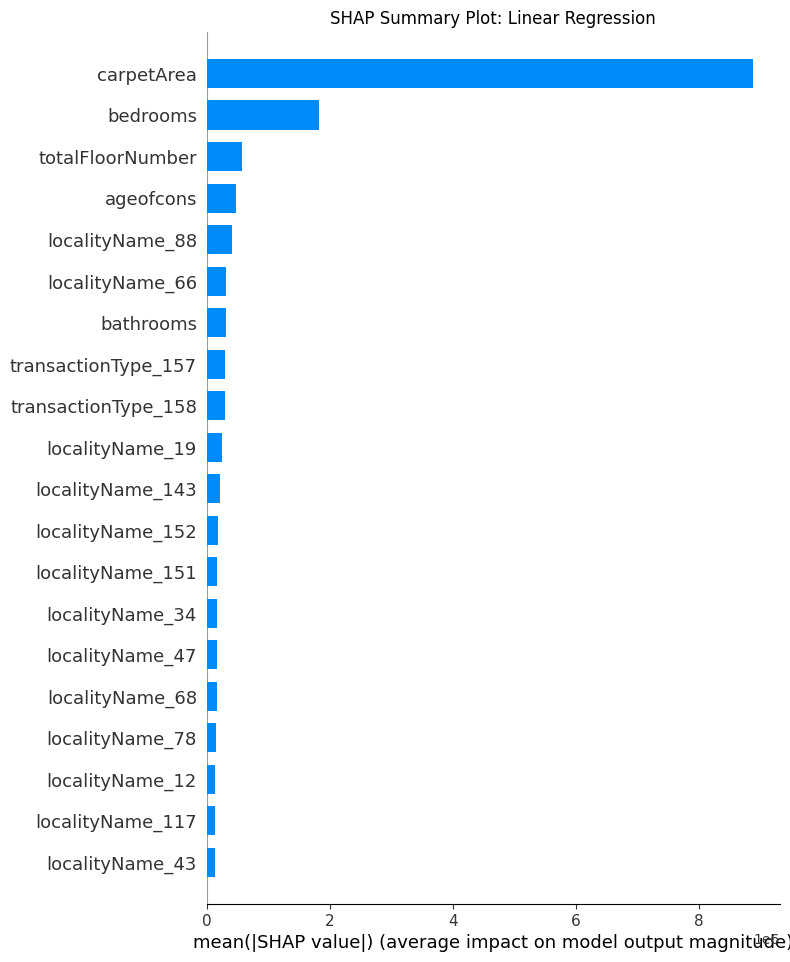

In [22]:
# # Create feature names for the one-hot encoded array (X_linear)
# feature_names_linear = np.empty(X_linear.shape[1], dtype=object)
# # Numeric columns:
# feature_names_linear[0] = "carpetArea"
# feature_names_linear[1] = "floorNumber"
# feature_names_linear[2] = "totalFloorNumber"
# feature_names_linear[3] = "bedrooms"
# feature_names_linear[4] = "bathrooms"
# # Sample names for localityName (154 columns)
# for i in range(5, 5+154):
#     feature_names_linear[i] = f"localityName_{i-4}"
# # Sample names for transactionType (2 columns)
# for i in range(5+154, 5+154+2):
#     feature_names_linear[i] = f"transactionType_{i-2}"
# # furnished (1 columns)
# feature_names_linear[-3] = "furnished"
# # ReservedParking (1 column)
# feature_names_linear[-2] = "ReservedParking"
# # ageofcons (1 column)
# feature_names_linear[-1] = "ageofcons"

# # Generate SHAP summary plot for Linear Regression
# plt.figure()
# shap.summary_plot(shap_values_lin, X_linear[sample_idx_linear],
#                   feature_names=feature_names_linear,
#                   show=False, plot_type="bar")
# plt.title("SHAP Summary Plot: Linear Regression")
# plt.show()

In [24]:
shap_values_lin.shape

(5000, 164)

In [26]:
mean_shap_values_lin.shape

(164,)

### Random Forest

In [11]:
# ===========================================================
# 2. SHAP for Random Forest Regressor (using X_tree)
# ===========================================================
rf_model_shap = RandomForestRegressor(n_estimators=150, random_state=42)
rf_model_shap.fit(X_tree, y_train)

# Use the TreeExplainer for tree-based models.
rf_explainer = shap.TreeExplainer(rf_model_shap)
shap_values_rf = rf_explainer.shap_values(X_tree[sample_idx_tree])

# Aggregate SHAP feature importances: mean absolute SHAP per feature.
mean_shap_values_rf = np.mean(np.abs(shap_values_rf), axis=0)
rf_shap_importance = dict(zip(tree_feature_names, mean_shap_values_rf))

pd.Series(rf_shap_importance).sort_values(ascending=False)/1000

carpetArea          7093.805291
localityName         840.498200
totalFloorNumber     658.284605
ageofcons            189.430215
furnished            183.470886
bedrooms             169.533981
floorNumber          163.292165
bathrooms            110.252430
transactionType      103.669391
ReservedParking       11.020150
dtype: float64

C:\Users\bhagy\AppData\Local\Temp\ipykernel_36252\2525000887.py:10: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_rf, X_tree[sample_idx_tree],


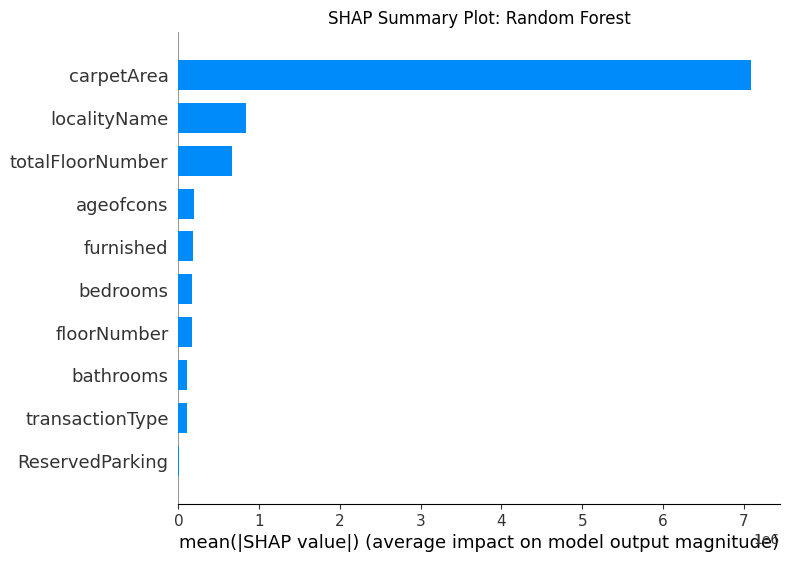

In [15]:
# Store in the global dictionary.
feature_importance_results["SHAP_RandomForest"] = {
    "model": rf_model_shap,
    "shap_values": shap_values_rf,
    "data": X_tree[sample_idx_tree],
    "agg_importance": rf_shap_importance
}

plt.figure()
shap.summary_plot(shap_values_rf, X_tree[sample_idx_tree],
                  feature_names=tree_feature_names,
                  show=False,
                  plot_type = "bar")
plt.title("SHAP Summary Plot: Random Forest")
plt.show()

### XGBoost

In [17]:
# ===========================================================
# 3. SHAP for XGBoost Regressor (using X_tree)
# ===========================================================
xgb_model_shap = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, n_estimators=100)
xgb_model_shap.fit(X_tree, y_train)

xgb_explainer = shap.TreeExplainer(xgb_model_shap)
shap_values_xgb = xgb_explainer.shap_values(X_tree[sample_idx_tree])

mean_shap_values_xgb = np.mean(np.abs(shap_values_xgb), axis=0)
xgb_shap_importance = dict(zip(tree_feature_names, mean_shap_values_xgb))

feature_importance_results["SHAP_XGBoost"] = {
    "model": xgb_model_shap,
    "shap_values": shap_values_xgb,
    "data": X_tree[sample_idx_tree],
    "agg_importance": xgb_shap_importance
}

pd.Series(xgb_shap_importance).sort_values(ascending=False)/1000

carpetArea          6509.825684
localityName        1425.487915
totalFloorNumber     797.018677
bedrooms             330.545319
bathrooms            254.671204
floorNumber          188.182831
furnished            186.429749
ageofcons            166.400696
transactionType      152.688248
ReservedParking       28.421686
dtype: float32

C:\Users\bhagy\AppData\Local\Temp\ipykernel_36252\3583545312.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_xgb, X_tree[sample_idx_tree],


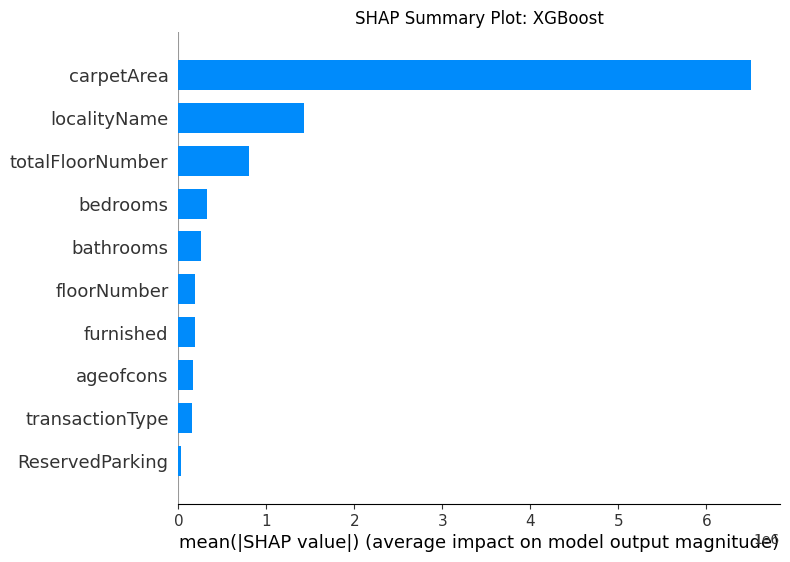

In [18]:
plt.figure()
shap.summary_plot(shap_values_xgb, X_tree[sample_idx_tree],
                  feature_names=tree_feature_names,
                  show=False,
                  plot_type="bar")
plt.title("SHAP Summary Plot: XGBoost")
plt.show()

### Decision Trees

In [20]:
# ===========================================================
# 4. SHAP for DecisionTree Regressor (using X_tree)
# ===========================================================
dt_model_shap = DecisionTreeRegressor(random_state=42)
dt_model_shap.fit(X_tree, y_train)

dt_explainer = shap.TreeExplainer(dt_model_shap)
shap_values_dt = dt_explainer.shap_values(X_tree[sample_idx_tree])

mean_shap_values_dt = np.mean(np.abs(shap_values_dt), axis=0)
dt_shap_importance = dict(zip(tree_feature_names, mean_shap_values_dt))

feature_importance_results["SHAP_DecisionTree"] = {
    "model": dt_model_shap,
    "shap_values": shap_values_dt,
    "data": X_tree[sample_idx_tree],
    "agg_importance": dt_shap_importance
}

pd.Series(dt_shap_importance).sort_values(ascending=False)/1000

carpetArea          7121.797325
localityName        1101.652597
totalFloorNumber     758.218258
ageofcons            408.491674
floorNumber          283.715045
bedrooms             242.345399
furnished            235.646097
bathrooms            146.058728
transactionType      108.913475
ReservedParking       16.531689
dtype: float64

C:\Users\bhagy\AppData\Local\Temp\ipykernel_36252\1835119326.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_dt, X_tree[sample_idx_tree],


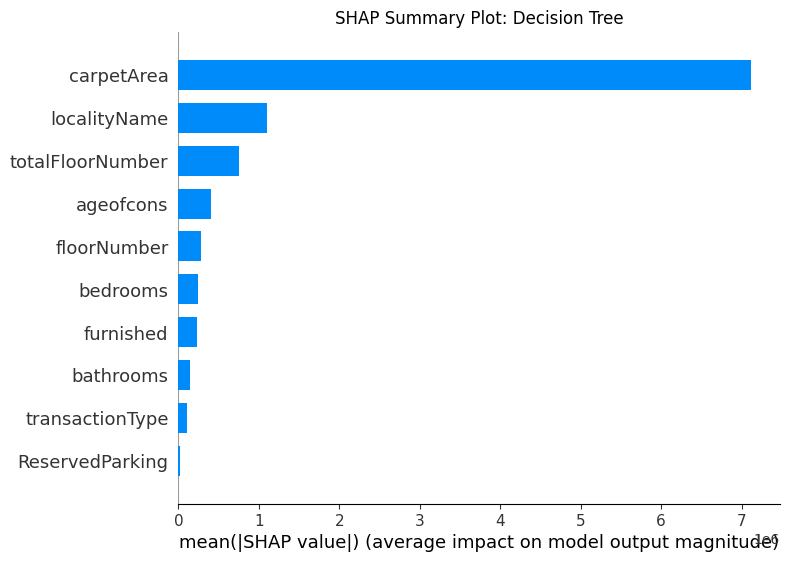

In [21]:
plt.figure()
shap.summary_plot(shap_values_dt, X_tree[sample_idx_tree],
                  feature_names=tree_feature_names,
                  show=False, plot_type="bar")
plt.title("SHAP Summary Plot: Decision Tree")
plt.show()

## Final Aggregation of All scores

### Observations

- Overall, ReservedParking is the least important feature. Can be removed.